## Image Denoising Using AutoEncoders in Keras and Python

### Task -1 : Import Libraries and Dataset

#### 1. Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#### 2. Loading Dataset

In [2]:
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()

#### 3. Visualize a sample image

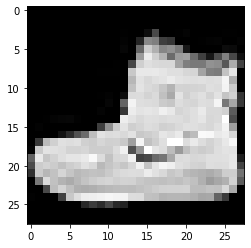

In [3]:
plt.imshow(x_train[0], cmap = 'gray')

#### 4. Checking out the shape of training data and testing data

In [4]:
print("x_train shape :" + str(x_train.shape))
print("y_train shape : " + str(y_train.shape))

print("x_test shape : " + str(x_test.shape))
print("y_test shape : " + str(y_test.shape))

x_train shape :(60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


### Task - 2 : Performing Data visualization

#### 5. viewing random image

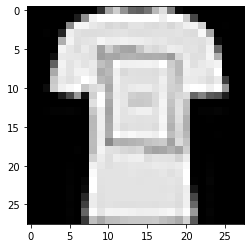

In [5]:
i = random.randint(1,60000)
plt.imshow(x_train[i], cmap = 'gray')

In [6]:
label = y_train[i]
label

0

#### 6. viewing images in grid view

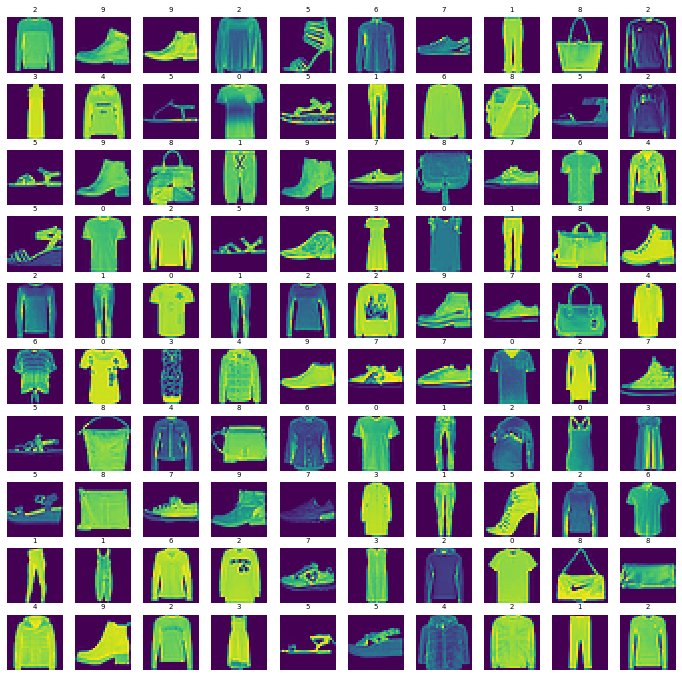

In [7]:
w_grid = 10
l_grid = 10

fig, axes = plt.subplots(l_grid, w_grid, figsize=(12,12))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid*l_grid): #second parameter: no. of images that will be displayed in (w_grid*l_grid) shape grid.
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 7)
    axes[i].axis('off')

### Task - 3 : Perform Data Pre-processing

#### 7. Normalize the data (interval [0,1])

In [8]:
x_train = x_train/255
x_test = x_test/255

#### 8. Adding noise in training data

In [9]:
noise_factor = 0.5 # 50% noise addition in training dataset
noise_dataset_train = []

for img in x_train:
    noisy_img = img + noise_factor*np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img, 0, 1)
    noise_dataset_train.append(noisy_img)

noise_dataset_train = np.array(noise_dataset_train)

#### 9.Adding noise in testing data

In [10]:
noise_factor = 0.5 # 50% noise addition in training dataset
noise_dataset_test = []

for img in x_test:
    noisy_img = img + noise_factor*np.random.randn(*img.shape)
    noisy_img = np.clip(noisy_img, 0, 1)
    noise_dataset_test.append(noisy_img)

noise_dataset_test = np.array(noise_dataset_test)

#### 10.Visualizing noisy image from train dataset and comparing it from original image

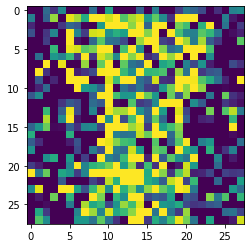

In [11]:
plt.imshow(noise_dataset_train[10])

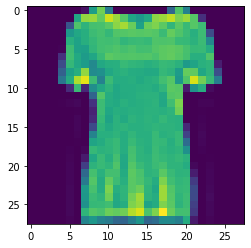

In [12]:
plt.imshow(x_train[10])

### Task - 4 : Build and Train Autoencoder (atrificial neural network)

In [13]:
dropout_rate = 0.5
autoencoder = tf.keras.models.Sequential()

#### 11. Building autoencoder part-1: ENCODER

In [14]:
#layer - 1
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 16,          
    kernel_size = 3,
    strides = 2,
    padding = 'same',
    input_shape = (28,28,1)))

#layer - 2
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 8, 
    kernel_size = 3, 
    strides = 2, 
    padding = 'same'))


In [15]:
#bottleneck layer (layer - 3)
autoencoder.add(tf.keras.layers.Conv2D(
    filters = 8, 
    kernel_size = 2, 
    strides = 1, 
    padding = 'same'))



#### 12. Building autoencoder part-2: Decoder

In [16]:
# layer - 4
autoencoder.add(tf.keras.layers.Conv2DTranspose(
    filters = 16, 
    kernel_size = 3, 
    strides = 2, 
    padding = 'same'))

#layer - 5
autoencoder.add(tf.keras.layers.Conv2DTranspose(
    filters = 1, 
    kernel_size = 3, 
    activation = 'sigmoid',
    strides = 2, 
    padding = 'same'))


#### 13. Displaying summary of autoencoder (layer by layer)

In [17]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           264       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


#### 14. Training autoencoder on our dataset

In [18]:
autoencoder.fit(
    noise_dataset_train.reshape(-1,28,28,1),
    x_train.reshape(-1,28,28,1),
    epochs = 10,
    batch_size = 100,
    validation_data = (noise_dataset_test.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1))
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 403us/sample - loss: 0.5646 - val_loss: 0.4116
Epoch 2/10
60000/60000 [==============================] - 23s 379us/sample - loss: 0.3804 - val_loss: 0.3647
Epoch 3/10
60000/60000 [==============================] - 24s 399us/sample - loss: 0.3538 - val_loss: 0.3493
Epoch 4/10
60000/60000 [==============================] - 23s 387us/sample - loss: 0.3430 - val_loss: 0.3420
Epoch 5/10
60000/60000 [==============================] - 23s 389us/sample - loss: 0.3375 - val_loss: 0.3380
Epoch 6/10
60000/60000 [==============================] - 24s 392us/sample - loss: 0.3344 - val_loss: 0.3356
Epoch 7/10
60000/60000 [==============================] - 24s 393us/sample - loss: 0.3324 - val_loss: 0.3339
Epoch 8/10
60000/60000 [==============================] - 24s 392us/sample - loss: 0.3310 - val_loss: 0.3326
Epoch 9/10
60000/60000 [==============================] - 24s 407us/sample - l

### Task - 5 : Evaluating Trained model performance

In [19]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1))
#print('test accuracy: ' ,(evaluation[1]))
print('test loss:- {:.4f}'.format(evaluation))


10000/10000 [==============================] - 3s 315us/sample - loss: 0.3308
test loss:- 0.3308


In [20]:
predicted = autoencoder.predict(noise_dataset_test[:10].reshape(-1,28,28,1))

#### 16. Visualizing and comparing Input images with Output images

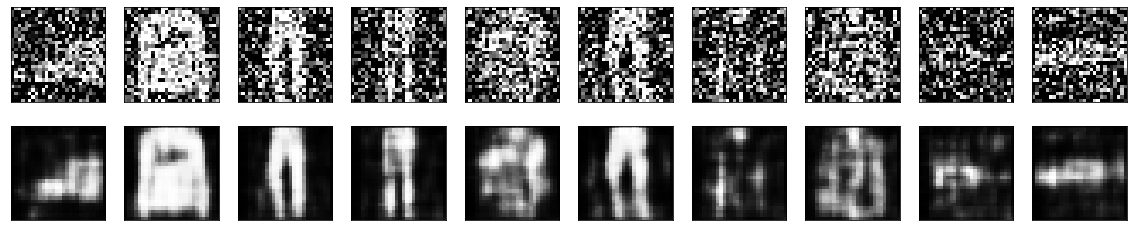

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
